<a href="https://colab.research.google.com/github/ML-brooowss/ML/blob/main/API_Embedding_PrecisionTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Prep datasets

In [4]:
#Library
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Load the datasets
interactions = pd.read_csv('https://raw.githubusercontent.com/linneverh/MachineLearning/main/interactions_train.csv')

# FOR: Google enhanced - author_date_title_description
# items1 = pd.read_csv("https://raw.githubusercontent.com/linneverh/ML/refs/heads/main/author_date_title_description/embeddings_part1.csv")
# items2 = pd.read_csv("https://raw.githubusercontent.com/linneverh/ML/refs/heads/main/author_date_title_description/embeddings_part2.csv")
# items = pd.concat([items1, items2])

#FOR: Google enhanced - author_date_title_subjects
# items1 = pd.read_csv("https://raw.githubusercontent.com/linneverh/ML/refs/heads/main/author_date_title_subjects/embeddings_part1.csv")
# items2 = pd.read_csv("https://raw.githubusercontent.com/linneverh/ML/refs/heads/main/author_date_title_subjects/embeddings_part2.csv")
# items = pd.concat([items1, items2])

#FOR: Google enhanced - title_description
# items1 = pd.read_csv("https://raw.githubusercontent.com/linneverh/ML/refs/heads/main/title_description/embeddings_part1.csv")
# items2 = pd.read_csv("https://raw.githubusercontent.com/linneverh/ML/refs/heads/main/title_description/embeddings_part2.csv")
# items = pd.concat([items1, items2])

#FOR: Google enhanced & ISBN enhanced - title_description
# items1 = pd.read_csv("https://media.githubusercontent.com/media/ML-brooowss/ML/refs/heads/main/final_items/title_description/embeddings_part1.csv")
# items2 = pd.read_csv("https://media.githubusercontent.com/media/ML-brooowss/ML/refs/heads/main/final_items/title_description/embeddings_part2.csv")
# items = pd.concat([items1, items2])

#FOR: Google enhanced & ISBN enhanced - title_clean
# items1 = pd.read_csv("https://media.githubusercontent.com/media/ML-brooowss/ML/refs/heads/main/final_items/title_clean/embeddings_part1.csv")
# items2 = pd.read_csv("https://media.githubusercontent.com/media/ML-brooowss/ML/refs/heads/main/final_items/title_clean/embeddings_part2.csv")
# items = pd.concat([items1, items2])

#FOR: Google enhanced & ISBN enhanced - date_title_description
# items1 = pd.read_csv("https://media.githubusercontent.com/media/ML-brooowss/ML/refs/heads/main/final_items/date_title_description/embeddings_part1.csv")
# items2 = pd.read_csv("https://media.githubusercontent.com/media/ML-brooowss/ML/refs/heads/main/final_items/date_title_description/embeddings_part2.csv")
# items = pd.concat([items1, items2])

#FOR: Google enhanced & ISBN enhanced - author_date_title_subjects
# items1 = pd.read_csv("https://media.githubusercontent.com/media/ML-brooowss/ML/refs/heads/main/final_items/author_date_title_subjects/embeddings_part1.csv")
# items2 = pd.read_csv("https://media.githubusercontent.com/media/ML-brooowss/ML/refs/heads/main/final_items/author_date_title_subjects/embeddings_part2.csv")
# items = pd.concat([items1, items2])

#FOR: Google enhanced & ISBN enhanced - author_date_title_description
# items1 = pd.read_csv("https://media.githubusercontent.com/media/ML-brooowss/ML/refs/heads/main/final_items/author_date_title_description/embeddings_part1.csv")
# items2 = pd.read_csv("https://media.githubusercontent.com/media/ML-brooowss/ML/refs/heads/main/final_items/author_date_title_description/embeddings_part2.csv")
# items = pd.concat([items1, items2])

#FOR: Google enhanced & ISBN priority - author_date_title_subjects

# items1 = pd.read_csv("https://media.githubusercontent.com/media/ML-brooowss/ML/refs/heads/main/final_items_isbnpriority/author_date_title_subjects/embeddings_part1.csv")
# items2 = pd.read_csv("https://media.githubusercontent.com/media/ML-brooowss/ML/refs/heads/main/final_items_isbnpriority/author_date_title_subjects/embeddings_part2.csv")
# items = pd.concat([items1, items2])

#FOR: Google enhanced & ISBN priority - author_date_title_description
# items1 = pd.read_csv("https://media.githubusercontent.com/media/ML-brooowss/ML/refs/heads/main/final_items_isbnpriority/author_date_title_description/embeddings_part1.csv")
# items2 = pd.read_csv("https://media.githubusercontent.com/media/ML-brooowss/ML/refs/heads/main/final_items_isbnpriority/author_date_title_description/embeddings_part2.csv")
# items = pd.concat([items1, items2])

#FOR: enhanced, old priority & bert creating topics - author_date_title_description
items1 = pd.read_csv("https://media.githubusercontent.com/media/ML-brooowss/ML/refs/heads/main/final_items_topic/author_date_title_topics/embeddings_part1.csv")
items2 = pd.read_csv("https://media.githubusercontent.com/media/ML-brooowss/ML/refs/heads/main/final_items_topic/author_date_title_topics/embeddings_part2.csv")
items = pd.concat([items1, items2])

#rename columns
interactions = interactions.rename(columns={'u': 'user_id', 'i': 'book_id', 't': 'timestamp'})
items=items.rename(columns={'i':'book_id'})

# Display the first rows of the updated interactions DataFrame
display(interactions.head())
display(items.head())

# Display the first rows of each dataset
display(interactions.head())
display(items.head())

,user_id,book_id,timestamp
0,4456,8581,1.687541e+09
1,142,1964,1.679585e+09
2,362,3705,1.706872e+09
3,1809,11317,1.673533e+09
4,4384,1323,1.681402e+09


,Unnamed: 0,CanonicalLink,Description,ISBN,ImageLink,Language,PublishedDate,Publisher,Subjects,Title,...,date_title_description,author_title_description,author_date_title_description,author_date_title,author_date_title_subjects,author_title_subjects,topic,topic_label,author_date_title_topics,embedding
0,723,https://books.google.com/books/about/Classific...,NaN,9782871303336,NaN,fr,2012.0,Ed du CEFAL,Classification décimale universelle; Indexatio...,Classification décimale universelle : édition ...,...,2012 Classification décimale universelle : édi...,UDC Consortium (The Hague) Classification déci...,UDC Consortium (The Hague) 2012 Classification...,UDC Consortium (The Hague) 2012 Classification...,UDC Consortium (The Hague) 2012 Classification...,UDC Consortium (The Hague) Classification déc...,34,NaN,UDC Consortium (The Hague) 2012 Classification...,"[0.001123949, -0.04861065, -0.043239154, -0.01..."
1,724,https://books.google.com/books/about/Les_inter...,C'est dans l'interaction en classe que s'actua...,9782278058327,NaN,fr,2011.0,Didier,didactique--langue étrangère - enseignement; d...,Les interactions dans l'enseignement des langu...,...,2011 Les interactions dans l'enseignement des ...,"Cicurel, Francine, Les interactions dans l'ens...","Cicurel, Francine, 2011 Les interactions dans ...","Cicurel, Francine, 2011 Les interactions dans ...","Cicurel, Francine, 2011 Les interactions dans ...","Cicurel, Francine, Les interactions dans l'en...",6,"suisse, pays, monde, vie, fes, vaud, histoire,...","Cicurel, Francine, 2011 Les interactions dans ...","[-0.0010352461, -0.02022575, -0.001530322, 0.0..."
2,725,https://books.google.com/books/about/Histoire_...,Depuis la parution en 1918 de l'ouvrage fondat...,2343190194,http://books.google.com/books/content?id=Q2PMD...,fr,2020.0,L'Harmattan,Histoires de vie en sociologie; Sciences socia...,Histoire de vie et recherche biographique : pe...,...,2020 Histoire de vie et recherche biographique...,"Aneta Slowik, Hervé Breton, Gaston Pineau Hist...","Aneta Slowik, Hervé Breton, Gaston Pineau 2020...","Aneta Slowik, Hervé Breton, Gaston Pineau 2020...","Aneta Slowik, Hervé Breton, Gaston Pineau 2020...","Aneta Slowik, Hervé Breton, Gaston Pineau His...",-1,"vie, monde, livre, roman, temps, ans, bien, nt...","Aneta Slowik, Hervé Breton, Gaston Pineau 2020...","[0.026383452, -0.036576252, -0.044983502, -0.0..."
3,726,https://books.google.com/books/about/Ce_livre_...,NaN,9782365350020,NaN,fr,2012.0,Vraoum!,Moyen-Orient; Bandes dessinées autobiographiqu...,Ce livre devrait me permettre de résoudre le c...,...,2012 Ce livre devrait me permettre de résoudre...,"Mazas, Sylvain, Ce livre devrait me permettre ...","Mazas, Sylvain, 2012 Ce livre devrait me perme...","Mazas, Sylvain, 2012 Ce livre devrait me perme...","Mazas, Sylvain, 2012 Ce livre devrait me perme...","Mazas, Sylvain, Ce livre devrait me permettre...",0,"femmes, monde, livre, vie, histoire, guerre, p...","Mazas, Sylvain, 2012 Ce livre devrait me perme...","[0.034063544, -0.037831508, -0.03971814, -0.00..."
4,727,https://books.google.com/books/about/Le_grand_...,"Trois histoires d'amour, un lanceur d'alerte, ...",9782702180815,http://books.google.com/books/content?id=f5u3z...,fr,2024.0,Calmann-Lévy,France--1945-1975; Roman historique; Roman fra...,Les années glorieuses : roman /,...,2024 Les années glorieuses : roman Trois histo...,"Lemaitre, Pierre, Les années glorieuses : roma...","Lemaitre, Pierre, 2024 Les années glorieuses :...","Lemaitre, Pierre, 2024 Les années glorieuses :...","Lemaitre, Pierre, 2024 Les années glorieuses :...","Lemaitre, Pierre, Les années glorieuses : rom...",19,"yoga, mudras, levain, mudra, gasquet, postures...","Lemaitre, Pierre, 2024 Les années glorieuses :...","[0.045714803, 0.011593069, 0.013200039, 0.0311..."


,user_id,book_id,timestamp
0,4456,8581,1.687541e+09
1,142,1964,1.679585e+09
2,362,3705,1.706872e+09
3,1809,11317,1.673533e+09
4,4384,1323,1.681402e+09


,Unnamed: 0,CanonicalLink,Description,ISBN,ImageLink,Language,PublishedDate,Publisher,Subjects,Title,...,date_title_description,author_title_description,author_date_title_description,author_date_title,author_date_title_subjects,author_title_subjects,topic,topic_label,author_date_title_topics,embedding
0,723,https://books.google.com/books/about/Classific...,NaN,9782871303336,NaN,fr,2012.0,Ed du CEFAL,Classification décimale universelle; Indexatio...,Classification décimale universelle : édition ...,...,2012 Classification décimale universelle : édi...,UDC Consortium (The Hague) Classification déci...,UDC Consortium (The Hague) 2012 Classification...,UDC Consortium (The Hague) 2012 Classification...,UDC Consortium (The Hague) 2012 Classification...,UDC Consortium (The Hague) Classification déc...,34,NaN,UDC Consortium (The Hague) 2012 Classification...,"[0.001123949, -0.04861065, -0.043239154, -0.01..."
1,724,https://books.google.com/books/about/Les_inter...,C'est dans l'interaction en classe que s'actua...,9782278058327,NaN,fr,2011.0,Didier,didactique--langue étrangère - enseignement; d...,Les interactions dans l'enseignement des langu...,...,2011 Les interactions dans l'enseignement des ...,"Cicurel, Francine, Les interactions dans l'ens...","Cicurel, Francine, 2011 Les interactions dans ...","Cicurel, Francine, 2011 Les interactions dans ...","Cicurel, Francine, 2011 Les interactions dans ...","Cicurel, Francine, Les interactions dans l'en...",6,"suisse, pays, monde, vie, fes, vaud, histoire,...","Cicurel, Francine, 2011 Les interactions dans ...","[-0.0010352461, -0.02022575, -0.001530322, 0.0..."
2,725,https://books.google.com/books/about/Histoire_...,Depuis la parution en 1918 de l'ouvrage fondat...,2343190194,http://books.google.com/books/content?id=Q2PMD...,fr,2020.0,L'Harmattan,Histoires de vie en sociologie; Sciences socia...,Histoire de vie et recherche biographique : pe...,...,2020 Histoire de vie et recherche biographique...,"Aneta Slowik, Hervé Breton, Gaston Pineau Hist...","Aneta Slowik, Hervé Breton, Gaston Pineau 2020...","Aneta Slowik, Hervé Breton, Gaston Pineau 2020...","Aneta Slowik, Hervé Breton, Gaston Pineau 2020...","Aneta Slowik, Hervé Breton, Gaston Pineau His...",-1,"vie, monde, livre, roman, temps, ans, bien, nt...","Aneta Slowik, Hervé Breton, Gaston Pineau 2020...","[0.026383452, -0.036576252, -0.044983502, -0.0..."
3,726,https://books.google.com/books/about/Ce_livre_...,NaN,9782365350020,NaN,fr,2012.0,Vraoum!,Moyen-Orient; Bandes dessinées autobiographiqu...,Ce livre devrait me permettre de résoudre le c...,...,2012 Ce livre devrait me permettre de résoudre...,"Mazas, Sylvain, Ce livre devrait me permettre ...","Mazas, Sylvain, 2012 Ce livre devrait me perme...","Mazas, Sylvain, 2012 Ce livre devrait me perme...","Mazas, Sylvain, 2012 Ce livre devrait me perme...","Mazas, Sylvain, Ce livre devrait me permettre...",0,"femmes, monde, livre, vie, histoire, guerre, p...","Mazas, Sylvain, 2012 Ce livre devrait me perme...","[0.034063544, -0.037831508, -0.03971814, -0.00..."
4,727,https://books.google.com/books/about/Le_grand_...,"Trois histoires d'amour, un lanceur d'alerte, ...",9782702180815,http://books.google.com/books/content?id=f5u3z...,fr,2024.0,Calmann-Lévy,France--1945-1975; Roman historique; Roman fra...,Les années glorieuses : roman /,...,2024 Les années glorieuses : roman Trois histo...,"Lemaitre, Pierre, Les années glorieuses : roma...","Lemaitre, Pierre, 2024 Les années glorieuses :...","Lemaitre, Pierre, 2024 Les années glorieuses :...","Lemaitre, Pierre, 2024 Les années glorieuses :...","Lemaitre, Pierre, Les années glorieuses : rom...",19,"yoga, mudras, levain, mudra, gasquet, postures...","Lemaitre, Pierre, 2024 Les années glorieuses :...","[0.045714803, 0.011593069, 0.013200039, 0.0311..."


In [ ]:
n_users = interactions.user_id.nunique()
n_items = items.book_id.nunique()
print(f'Number of users = {n_users}, \n Number of books = {n_items} \n Number of interactions = {len(interactions)}')

Number of users = 7838, 
 Number of books = 15291 
 Number of interactions = 87047


####TRAIN/TEST SPLIT

In [ ]:
interactions = interactions.sort_values(["user_id", "timestamp"])
interactions.head(10)
interactions["pct_rank"] = interactions.groupby("user_id")["timestamp"].rank(pct=True, method='dense')
interactions.reset_index(inplace=True, drop=True)
interactions.head(10)
train_data = interactions[interactions["pct_rank"] < 0.8]
test_data = interactions[interactions["pct_rank"] >= 0.8]
print("Training set size:", train_data.shape[0])
print("Testing set size:", test_data.shape[0])

Training set size: 65419
Testing set size: 21628


In [ ]:
# Define a function to create the data matrix
def create_data_matrix(data, n_users, n_items):
    """
    This function returns a numpy matrix with shape (n_users, n_items).
    Each entry is a binary value indicating positive interaction.
    """
    data_matrix = np.zeros((n_users, n_items))
    data_matrix[data["user_id"].values, data["book_id"].values] = 1
    return data_matrix

In [ ]:
# Create the training and testing matrices
train_data_matrix = create_data_matrix(train_data, n_users, n_items)
test_data_matrix = create_data_matrix(test_data, n_users, n_items)

# Display the matrices to understand their structure
print('train_data_matrix')
print(train_data_matrix)
print("number of non-zero values: ", np.sum(train_data_matrix))
print('test_data_matrix')
print(test_data_matrix)
print("number of non-zero values: ", np.sum(test_data_matrix))

train_data_matrix
[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
number of non-zero values:  49689.0
test_data_matrix
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
number of non-zero values:  19409.0


#### BASIC DEFINITIONS NEEDED

In [ ]:
# Define a function to create the data matrix
def create_data_matrix(data, n_users, n_items):
    """
    This function returns a numpy matrix with shape (n_users, n_items).
    Each entry is a binary value indicating positive interaction.
    """
    data_matrix = np.zeros((n_users, n_items))
    data_matrix[data["user_id"].values, data["book_id"].values] = 1
    return data_matrix

In [ ]:
# Define the function to predict interactions based on item similarity
def item_based_predict(interactions, similarity, epsilon=1e-9):
    """
    Predicts user-item interactions based on item-item similarity.
    Parameters:
        interactions (numpy array): The user-item interaction matrix.
        similarity (numpy array): The item-item similarity matrix.
        epsilon (float): Small constant added to the denominator to avoid division by zero.
    Returns:
        numpy array: The predicted interaction scores for each user-item pair.
    """
    # np.dot does the matrix multiplication. Here we are calculating the
    # weighted sum of interactions based on item similarity
    pred = similarity.dot(interactions.T) / (similarity.sum(axis=1)[:, np.newaxis] + epsilon)
    return pred.T  # Transpose to get users as rows and items as columns

In [ ]:
# Recommendation frame generation
def create_recommendation_table(user_predictions, top_n=10, separator=" "):
    """
    Creates a table of top-N recommendations for each user.

    Args:
        user_predictions (numpy.ndarray): Rows = users, columns = items. Predicted scores.
        top_n (int): Number of top recommendations per user.
        separator (str): Delimiter to join recommended book IDs.

    Returns:
        pandas.DataFrame: Columns = ['user_id', 'recommendation'].
    """
    recommendations = []
    num_users = user_predictions.shape[0]

    for user_id in range(num_users):
        top_items = np.argsort(user_predictions[user_id, :])[-top_n:][::-1]
        recommendations.append({
            'user_id': user_id,
            'recommendation': separator.join(map(str, top_items))
        })

    return pd.DataFrame(recommendations)

In [ ]:
# Implement the precision_recall_at_k function
def precision_recall_at_k(prediction, ground_truth, k=10):
    """
    Calculates Precision@K and Recall@K for top-K recommendations.
    Parameters:
        prediction (numpy array): The predicted interaction matrix with scores.
        ground_truth (numpy array): The ground truth interaction matrix (binary).
        k (int): Number of top recommendations to consider.
    Returns:
        precision_at_k (float): The average precision@K over all users.
        recall_at_k (float): The average recall@K over all users.
    """
    num_users = prediction.shape[0]
    precision_at_k, recall_at_k = 0, 0

    for user in range(num_users):
        # TODO: Get the indices of the top-K items for the user based on predicted scores
        top_k_items = np.argsort(prediction[user, :])[-k:]

        # TODO: Calculate the number of relevant items in the top-K items for the user
        relevant_items_in_top_k = np.isin(top_k_items, np.where(ground_truth[user, :] == 1)[0]).sum()

        # TODO: Calculate the total number of relevant items for the user
        total_relevant_items = ground_truth[user, :].sum()

        # Precision@K and Recall@K for this user
        precision_at_k += relevant_items_in_top_k / k
        recall_at_k += relevant_items_in_top_k / total_relevant_items if total_relevant_items > 0 else 0

    # Average Precision@K and Recall@K over all users
    precision_at_k /= num_users
    recall_at_k /= num_users

    return precision_at_k, recall_at_k

#### 1) API Embeddings tests
**author_date_title_DESCRIPTION:** <BR>
Item-based EMBED Precision@K: 0.03849196223526418  <BR>
Item-based EMBED Recall@K: 0.21465701620473912<BR>

**author_date_title_SUBJECT:**<BR>
Item-based EMBED Precision@K: 0.038645062515948056 <BR>
Item-based EMBED Recall@K: 0.21499394666978877

**title_description:**<BR>
Item-based EMBED Precision@K: 0.03685889257463616 <BR>
Item-based EMBED Recall@K: 0.20913895560787144

#### 2) API & ISBN Enhanced
**title_description:** <BR>
Item-based EMBED Precision@K: 0.041949476907374994 <BR>
Item-based EMBED Recall@K: 0.23841547178715042

**title_clean:** <BR>
Item-based EMBED Precision@K: 0.04300842051543835<BR>
Item-based EMBED Recall@K: 0.2468953315945196

**date_title_description:** <BR>
Item-based EMBED Precision@K: 0.04203878540444055 <BR>
Item-based EMBED Recall@K: 0.2374662585686774

**author_date_title_subject:** <BR>
Item-based EMBED Precision@K: 0.04866037254401807 <BR>
Item-based EMBED Recall@K: 0.2707247031495884

**author_date_title_description:** <BR>
Item-based EMBED Precision@K: 0.044322531257974966 <BR>
Item-based EMBED Recall@K: 0.24604297371229825

#### 2) API & ISBN Priority
**author_date_title_description:** <BR>
Item-based EMBED Precision@K: 0.048443480479715986 <BR>
Item-based EMBED Recall@K: 0.2701337779187839

**author_date_title_description:** <BR>
Item-based EMBED Precision@K: 0.04609594284256317<BR>
Item-based EMBED Recall@K: 0.25579976085764283

#### 3) API Priority, Bert Creating topics
**author_date_title_topics**<BR>
Item-based EMBED Precision@K: 0.043276346006635144<BR>
Item-based EMBED Recall@K: 0.2453383501587466<BR>



In [ ]:
entire_data= create_data_matrix(interactions, n_users, n_items)

In [ ]:
# Create the training and testing matrices
train_data_matrix = create_data_matrix(train_data, n_users, n_items)
test_data_matrix = create_data_matrix(test_data, n_users, n_items)

# Display the matrices to understand their structure
print('train_data_matrix')
print(train_data_matrix)
print("number of non-zero values: ", np.sum(train_data_matrix))
print('test_data_matrix')
print(test_data_matrix)
print("number of non-zero values: ", np.sum(test_data_matrix))

train_data_matrix
[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
number of non-zero values:  49689.0
test_data_matrix
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
number of non-zero values:  19409.0


In [ ]:
# Select only the item IDs in the training data matrix
train_item_ids = range(train_data.shape[1])

# Ensure correct item order by aligning to the item indices used in the train matrix
items_ordered = items.set_index('book_id').loc[train_item_ids]

# Parse the embedding strings into numpy arrays
items_ordered['embedding'] = items_ordered['embedding'].apply(lambda x: np.fromstring(x.strip('[]'), sep=','))

# Drop rows with missing or malformed embeddings (if any)
valid_items = items_ordered[items_ordered['embedding'].notna()].reset_index(drop=True)

# Stack embeddings into a matrix
embedding_matrix = np.vstack(valid_items['embedding'].values)

# Compute cosine similarity
embedding_sim = cosine_similarity(embedding_matrix)

In [ ]:
# Calculate the item-based predictions for positive interactions
item_EMBED_prediction = item_based_predict(train_data_matrix, embedding_sim)
print("Predicted Interaction Matrix:")
print(item_EMBED_prediction)
print(item_EMBED_prediction.shape)

In [ ]:
# CHECK PRECISION & RECALL NOT YET WITH CROSS-VALIDATION [OVERFITTING PROBLEM THOUGH]
precision_item_k, recall_item_k = precision_recall_at_k(item_EMBED_prediction, test_data_matrix, k=10)
print('Item-based EMBED Precision@K:', precision_item_k)
print('Item-based EMBED Recall@K:', recall_item_k)

Item-based EMBED Precision@K: 0.043276346006635144
Item-based EMBED Recall@K: 0.2453383501587466


<ipython-input-5-60fc216cb403>:58: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


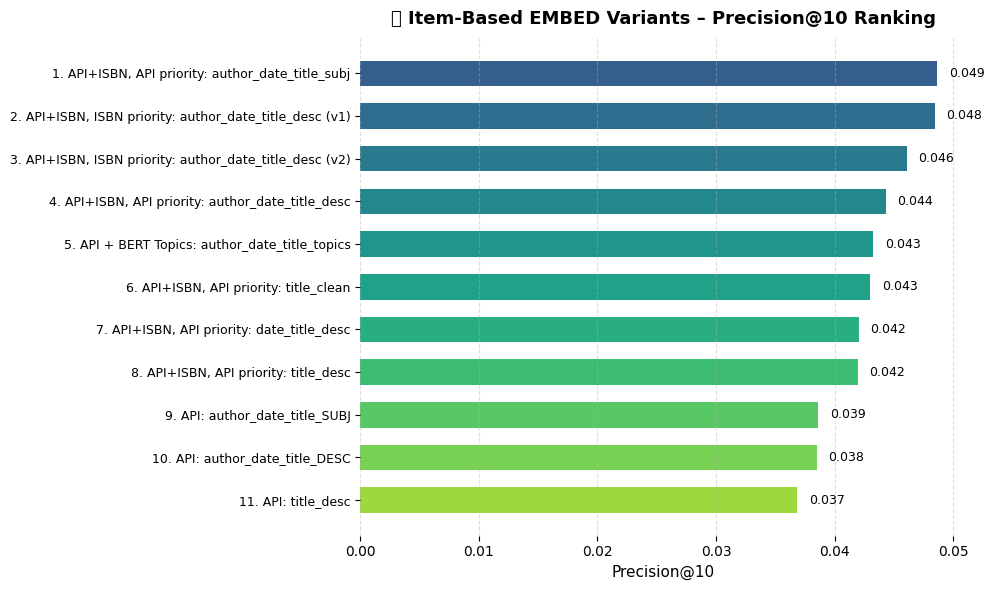

In [ ]:
# Data
labels = [
    "API: author_date_title_DESC",
    "API: author_date_title_SUBJ",
    "API: title_desc",
    "API+ISBN, API priority: title_desc",
    "API+ISBN, API priority: title_clean",
    "API+ISBN, API priority: date_title_desc",
    "API+ISBN, API priority: author_date_title_subj",
    "API+ISBN, API priority: author_date_title_desc",
    "API+ISBN, ISBN priority: author_date_title_desc (v1)",
    "API+ISBN, ISBN priority: author_date_title_desc (v2)",
    "API + BERT Topics: author_date_title_topics"
]

precision_at_10 = [
    0.03849196223526418,
    0.038645062515948056,
    0.03685889257463616,
    0.041949476907374994,
    0.04300842051543835,
    0.04203878540444055,
    0.04866037254401807,
    0.044322531257974966,
    0.048443480479715986,
    0.04609594284256317,
    0.043276346006635144
]

# Sort by precision
sorted_data = sorted(zip(precision_at_10, labels), reverse=True)
sorted_precision, sorted_labels = zip(*sorted_data)

# Plot setup
fig, ax = plt.subplots(figsize=(10, 6))
bar_colors = plt.cm.viridis(np.linspace(0.3, 0.85, len(sorted_labels)))

# Plot bars
bars = ax.barh(range(len(sorted_labels)), sorted_precision, color=bar_colors, height=0.6)

# Add precision labels
for i, (bar, value) in enumerate(zip(bars, sorted_precision)):
    ax.text(value + 0.001, bar.get_y() + bar.get_height()/2,
            f"{value:.3f}", va='center', ha='left', fontsize=9)

# Axis formatting
ax.set_yticks(range(len(sorted_labels)))
ax.set_yticklabels([f"{i+1}. {label}" for i, label in enumerate(sorted_labels)], fontsize=9)
ax.invert_yaxis()  # Highest first
ax.set_xlabel("Precision@10", fontsize=11)
ax.set_title("📚 Item-Based EMBED Variants – Precision@10 Ranking", fontsize=13, weight='bold', pad=10)
ax.grid(axis='x', linestyle='--', alpha=0.4)

# Aesthetics
plt.tight_layout()
plt.box(False)
plt.show()
